In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [32]:
# Step 1 : Load Data
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target
print("Dataset (first 5 rows) : \n", df.head())

Dataset (first 5 rows) : 
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [34]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

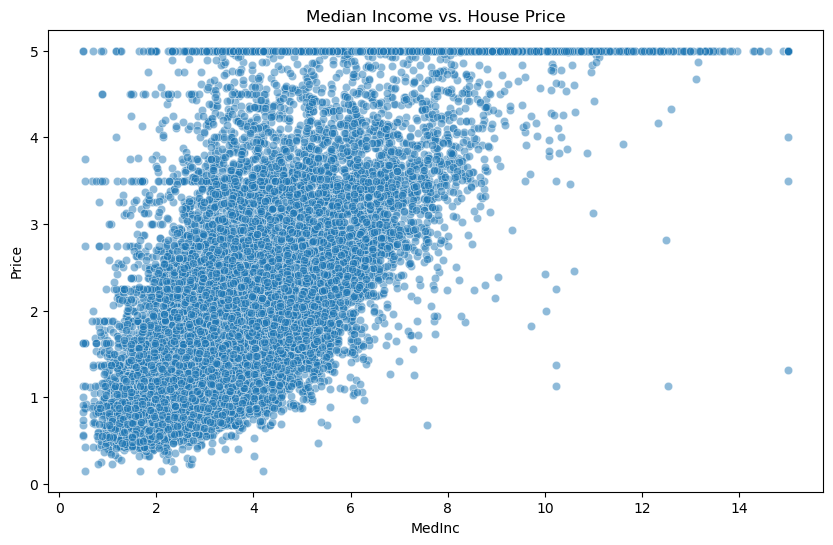

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='MedInc', y='Price', data=df, alpha=0.5)
plt.title('Median Income vs. House Price')
plt.show()

In [36]:
print("Correlation with Price : \n", df.corr()['Price'].sort_values())

Correlation with Price : 
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
Price         1.000000
Name: Price, dtype: float64


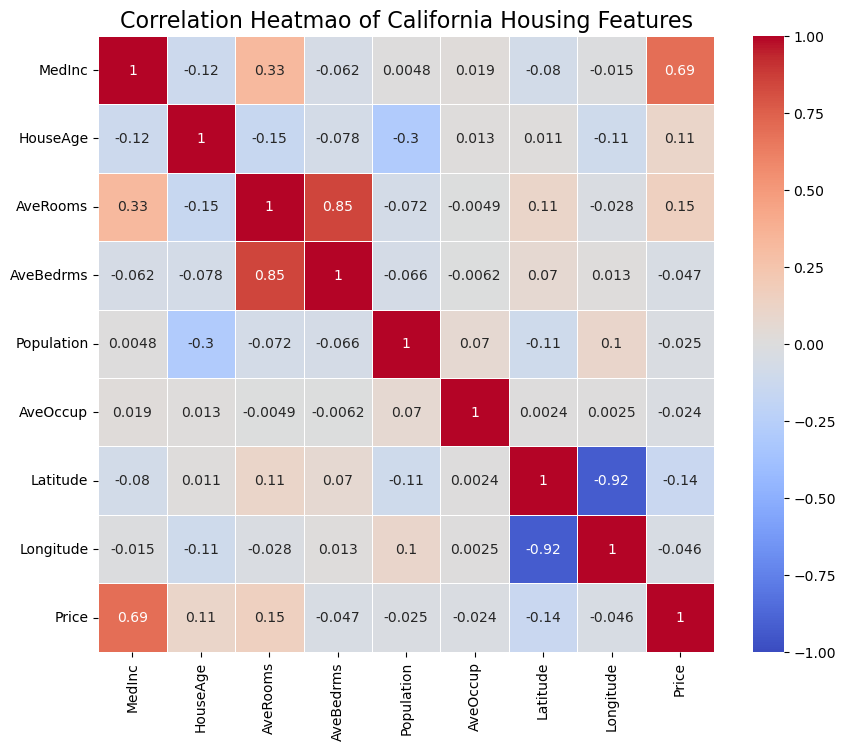

In [37]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Set up the plot
plt.figure(figsize=(10,8)) # Size of the plot

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,      # Show numbers in square
            cmap='coolwarm', # Color scheme (red=positive, blue=negative)
            vmin=-1, vmax=1, # Range of correlation values
            center=0,        # Center colormap at 0
            square=True,     # Make sqaures uniform
            linewidth=0.5)   # Lines between squares

# Add title
plt.title('Correlation Heatmao of California Housing Features', fontsize=16)
plt.show()

In [38]:
# Prepare Data
X = df[['MedInc']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Linear Equation : Price = {model.coef_[0]:.2f} * MedInc + {model.intercept_:.2f}")

Linear Equation : Price = 0.42 * MedInc + 0.44


In [40]:
# Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"MAE : {mae:.2f} $100K")
print(f"RMSE : {rmse:.2f} $100K")
print(f"R2 : {r2:.2f}")

MAE : 0.63 $100K
RMSE : 0.84 $100K
R2 : 0.46


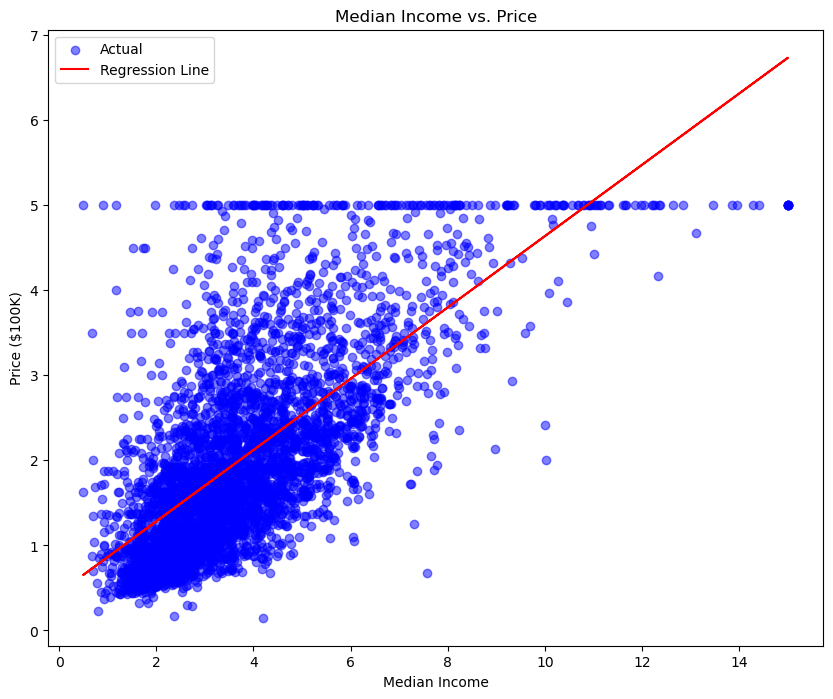

In [41]:
# Visualize
plt.figure(figsize=(10,8))
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Median Income vs. Price')
plt.xlabel('Median Income')
plt.ylabel('Price ($100K)')
plt.legend()
plt.show()